In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
k_values = range(4, 9)
nums = {k: np.random.uniform(0, 1, 10**k).astype(np.float32) for k in k_values}
sorted_nums = {k: sorted(nums[k]) for k in k_values}

def sum_with_double_precision(numbers):
    sum_double = np.float64(0.0)
    for num in numbers:
        sum_double += num
    return sum_double

def sum_with_single_precision(numbers):
    sum_double = np.float32(0.0)
    for num in numbers:
        sum_double += num
    return sum_double

In [27]:
results_a = [sum_with_double_precision(nums[k]) for k in k_values]

In [28]:
results_b = [sum_with_single_precision(nums[k]) for k in k_values]

In [29]:
results_c = []
for k in k_values:
    n = len(nums[k])
    acc = np.float32(0.0)
    err = np.float32(0.0)
    for i in range(n):
        y = nums[k][i] - err
        temp = acc + y
        err = (temp - acc) - y
        acc = temp
    results_c.append(acc)

In [30]:
results_d = [sum_with_single_precision(sorted_nums[k]) for k in k_values]

In [31]:
results_e = [sum_with_single_precision(sorted_nums[k][::-1]) for k in k_values]

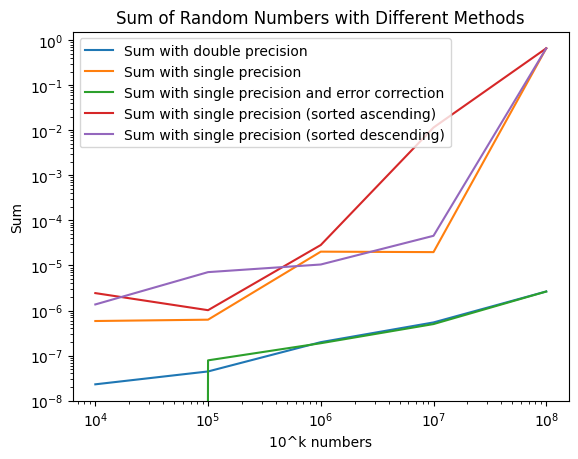

In [32]:
n_values = [10**k for k in k_values]
real_sums = [np.sum(nums[k]) for k in k_values]

plt.loglog(n_values, [(abs(x - y) / x) for x, y in zip(real_sums, results_a)], label='Sum with double precision')
plt.loglog(n_values, [(abs(x - y) / x) for x, y in zip(real_sums, results_b)], label='Sum with single precision')
plt.loglog(n_values, [(abs(x - y) / x) for x, y in zip(real_sums, results_c)], label='Sum with single precision and error correction')
plt.loglog(n_values, [(abs(x - y) / x) for x, y in zip(real_sums, results_d)], label='Sum with single precision (sorted ascending)')
plt.loglog(n_values, [(abs(x - y) / x) for x, y in zip(real_sums, results_e)], label='Sum with single precision (sorted descending)')

plt.xlabel('10^k numbers')
plt.ylabel('Sum')
plt.title('Sum of Random Numbers with Different Methods')
plt.legend()
plt.show()